In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn.datasets import load_win
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [74]:
# TODO:
# 1. Load the wine dataset (complete)
# 2. Perform PCA(complete)
# 3. Visualize PCA results (e.g., scatter plot, explained variance) (complete)
#which ever you complete put complete infront of it

1)a) The wine data set has around 170 components and 13 features(We have added one but did not use for PCA) since there are 13 features we cant plot it so we you PCA to reduce the dimension but hopefully keep the wines in the group they belong and by group is what ever we choose to group them with.

In [75]:
#load wine and put it in a data frame to print it 
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

#printing wine data frame
print(wine_df.head)

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [76]:
#Load and scale the wine dataset
def load_and_scale_data():
    
    # Load wine data from sklearn.datasets
    wine = load_wine()
    data = wine.data
    target = wine.target

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data, target, wine.feature_names
   

In [77]:
#Perform PCA using SVD
def pca_svd(data):

    # Perform Singular Value Decomposition (SVD)
    U, s, VT = np.linalg.svd(data.T)
    
    # Return the left singular vectors (U), singular values (s), and right singular vectors (VT)
    return U, s, VT

In [78]:
#Plot the first two principal components
def plot_first_two_pcs(U, data, target):
    # Calculate the first two principal components
    # Create a scatter plot of the first two principal components
    # Color code points according to the target variable

    k = 2  # number of components to keep
    Uk = U[:, :k]
    x_pca = np.dot(data, Uk)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target, cmap='plasma')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.title('PCA of Wine Dataset')
    plt.show()


In [79]:
#Create a heatmap for the first two principal components
def heatmap_first_two_pcs(U, feature_names):

    k = 2  # Number of components to keep
    Uk = U[:, :k]  # Extract the first two columns of U for the first two principal components
    df_comp = pd.DataFrame(Uk.T, columns=feature_names)  # Create DataFrame for heatmap
    
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_comp, cmap='Blues',fmt=".1f", annot=False, yticklabels=['PC1', 'PC2'])
    plt.xticks(rotation=90)
    plt.title('Heatmap of the First Two Principal Components')
    plt.show()

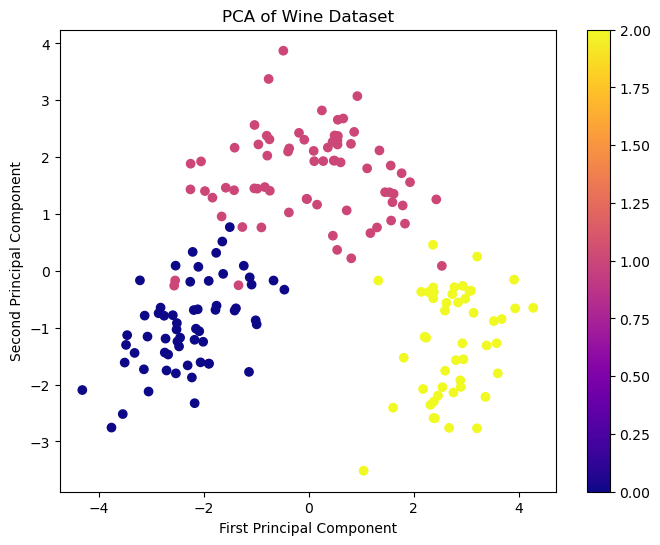

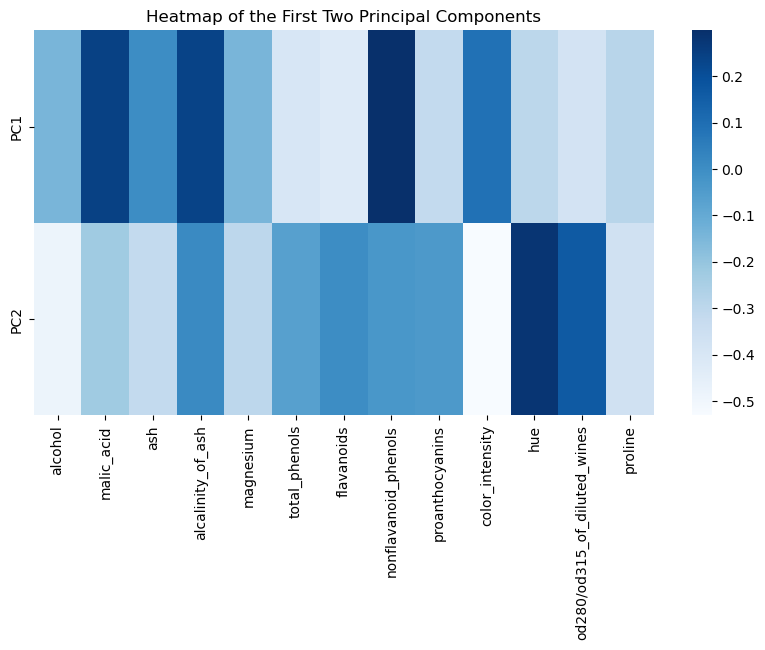

In [80]:
if __name__ == "__main__":
    # Load and preprocess data
    wine_scaled, wine_target, wine_feature_names = load_and_scale_data()
    
    # Perform PCA
    U, s, VT = pca_svd(wine_scaled)
    
    # Plotting functions
    plot_first_two_pcs(U, wine_scaled, wine_target)
    heatmap_first_two_pcs(U, wine_feature_names)

2b) there seem to be a slight overlapping between the clusters and wether or not this is enough percision goes back to what we want to do with the data but for just visualizing its clear enough with color coding.

2e) It seems that pc1 and pc2 are completeley different from each other  they may have 1 or 2 features that are similar to each other but seeing that most features are not even close to each means they are different as if they are different catergories.

3f) this data set has 13 feature if we were to plot it with the original feature how do we decide which features should we use? if we were not choose only 2 feature and use all of them there is not visual clarity and if we were plot all of them in 1 graph there are again 13 features there are no 13 demientional graphs that we can visualize at best its going to be a 3d graph. that exactly why we did PCA so can we can visualize things in 2d or 3d manner. (in this case 2d)